In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback

In [ ]:
# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 14s 0us/step


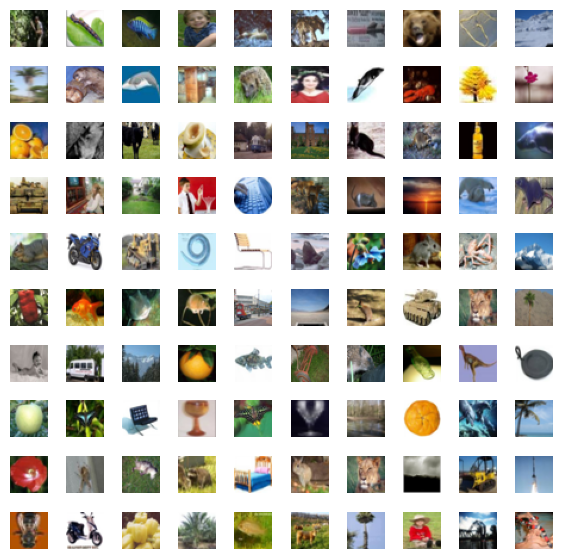

In [ ]:
# Display a 10x10 grid of random images from different classes in CIFAR-100
fig, axes = plt.subplots(10, 10, figsize=(7, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(10):
    for j in range(10):
        class_index = random.randint(0, 99)
        class_indices = np.where(y_train[:, 0] == class_index)[0]
        random_index = random.choice(class_indices)
        axes[i, j].imshow(x_train[random_index])
        axes[i, j].axis('off')

plt.show()

In [ ]:
# Preprocess the data for CIFAR-100
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 100) 
y_test = to_categorical(y_test, 100)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Find the best epoch using early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

In [ ]:
# # Train the model on CIFAR-100
# history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, PrintTrainingAccuracy()])

In [ ]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == (self.params['epochs'] - 1):
            accuracy_key = 'accuracy' if 'accuracy' in logs else 'acc'
            print(f'\nTraining accuracy for the last epoch: {logs[accuracy_key]:.4f}')

            # plt.figure(figsize=(12, 4))

            # # Plotting accuracy
            # plt.subplot(1, 2, 1)
            # plt.plot(history.history['accuracy'], label='Training Accuracy')
            # plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            # plt.xlabel('Epoch')
            # plt.ylabel('Accuracy')
            # plt.legend()

            # # Plotting loss
            # plt.subplot(1, 2, 2)
            # plt.plot(history.history['loss'], label='Training Loss')
            # plt.plot(history.history['val_loss'], label='Validation Loss')
            # plt.xlabel('Epoch')
            # plt.ylabel('Loss')
            # plt.legend()

            # plt.show()

In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2, callbacks=[es, CustomCallback()])

Epoch 1/15
  1/625 [..............................] - ETA: 9s - loss: 2.0099 - accuracy: 0.4531

625/625 [==============================] - 6s 10ms/step - loss: 1.7697 - accuracy: 0.5090 - val_loss: 2.2453 - val_accuracy: 0.4226
Epoch 2/15
625/625 [==============================] - 5s 8ms/step - loss: 1.7343 - accuracy: 0.5178 - val_loss: 2.2749 - val_accuracy: 0.4274
Epoch 3/15
625/625 [==============================] - 6s 9ms/step - loss: 1.7021 - accuracy: 0.5242 - val_loss: 2.2662 - val_accuracy: 0.4283
Epoch 4/15
625/625 [==============================] - 5s 8ms/step - loss: 1.6881 - accuracy: 0.5263 - val_loss: 2.2522 - val_accuracy: 0.4329
Epoch 5/15
625/625 [==============================] - 5s 8ms/step - loss: 1.6509 - accuracy: 0.5339 - val_loss: 2.2541 - val_accuracy: 0.4374
Epoch 6/15
625/625 [==============================] - 6s 9ms/step - loss: 1.6396 - accuracy: 0.5396 - val_loss: 2.2950 - val_accuracy: 0.4232
Epoch 7/15
625/625 [==============================] - 5s 8ms/step - loss: 1.6150 - accuracy: 0.5462 - val_loss: 2.2671 - val_accuracy: 0.4333
Epoch 8/15
625/6

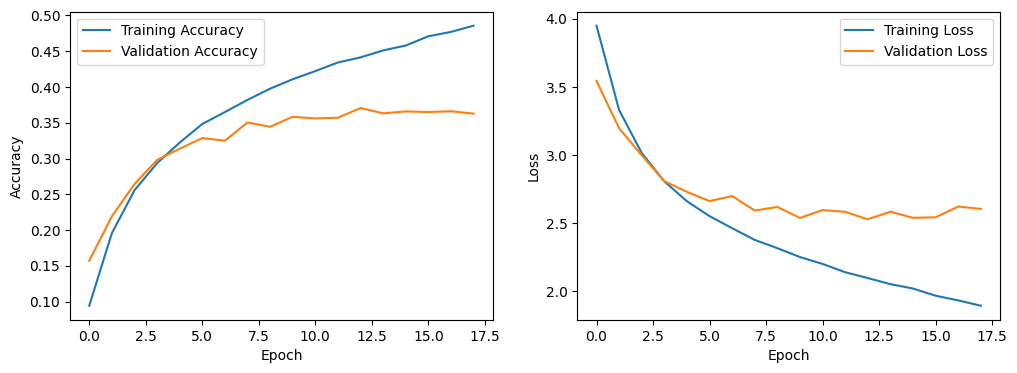

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
